In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('IMDBdataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [4]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
# Preprocess the data
max_words = 10000
maxlen = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['review'])
sequences = tokenizer.texts_to_sequences(df['review'])
X = pad_sequences(sequences, maxlen=maxlen)
y = (df['sentiment'] == 'positive').astype(int)


In [6]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Build the model
model = Sequential()
model.add(Embedding(max_words, 32, input_length=maxlen))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

In [8]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5


250/250 [==============================] - 28s 103ms/step - loss: 0.4367 - accuracy: 0.7867 - val_loss: 0.3249 - val_accuracy: 0.8602
Epoch 2/5
250/250 [==============================] - 25s 99ms/step - loss: 0.2746 - accuracy: 0.8894 - val_loss: 0.3235 - val_accuracy: 0.8601
Epoch 3/5
250/250 [==============================] - 24s 97ms/step - loss: 0.2363 - accuracy: 0.9070 - val_loss: 0.3371 - val_accuracy: 0.8569
Epoch 4/5
250/250 [==============================] - 25s 102ms/step - loss: 0.2046 - accuracy: 0.9213 - val_loss: 0.3509 - val_accuracy: 0.8512
Epoch 5/5
250/250 [==============================] - 24s 98ms/step - loss: 0.1784 - accuracy: 0.9341 - val_loss: 0.4106 - val_accuracy: 0.8475


In [10]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}, Test accuracy: {accuracy}')

313/313 [==============================] - 4s 11ms/step - loss: 0.4029 - accuracy: 0.8488
Test loss: 0.40289178490638733, Test accuracy: 0.848800003528595


In [11]:
# Confusion matrix and classification report
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred_classes)
print("\nConfusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

313/313 [==============================] - 5s 14ms/step

Confusion Matrix:
[[4280  681]
 [ 831 4208]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      4961
           1       0.86      0.84      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



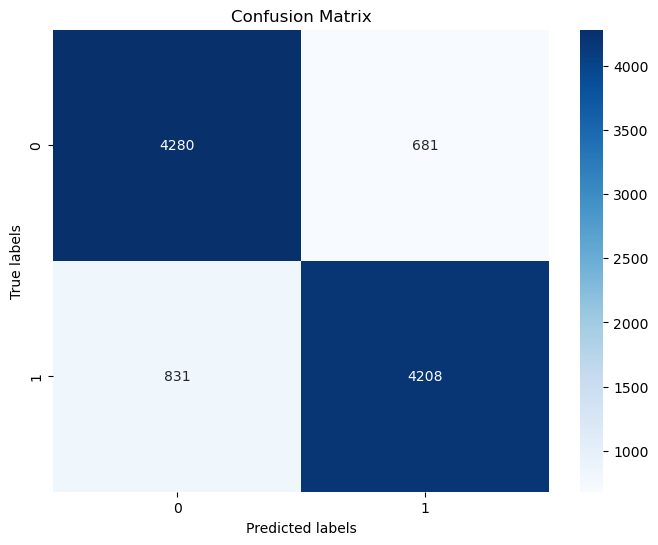

In [12]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

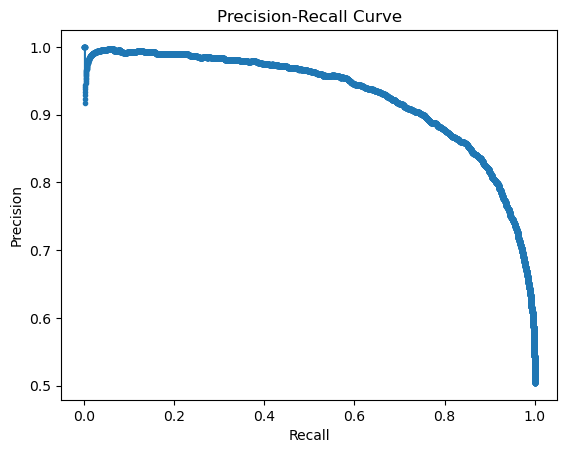

In [13]:
# Precision-recall curve
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

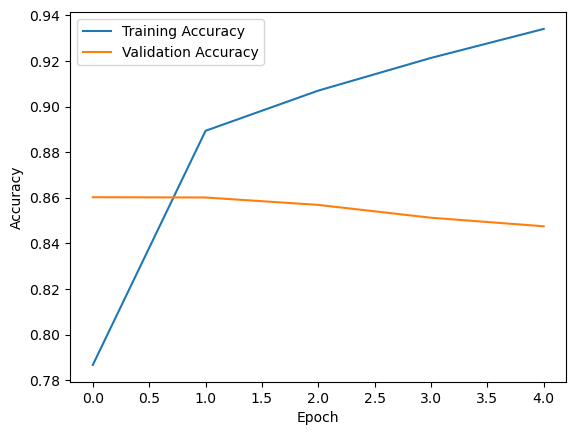

In [14]:
# Plot the accuracy graph
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [15]:
# Make predictions
predictions = model.predict(X_test[:5])
for i in range(5):
    sentiment = 'positive' if predictions[i] > 0.5 else 'negative'
    print(f'Review: {df["review"][i]}')
    print(f'Predicted Sentiment: {sentiment}')
    print()

1/1 [==============================] - 0s 34ms/step
Review: One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br